In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### Download dataset from Kaggle

In [2]:
!pip install opendatasets -q

In [3]:
import opendatasets as od

Dataset Link: https://www.kaggle.com/datasets/andonians/random-linear-regression

In [4]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gayathrisenanayake14@gmail.com
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 2.45MB/s]

In [5]:
data = pd.read_csv("random-linear-regression/test.csv")

In [ ]:
# # Load downloaded dataset
# data = pd.read_csv("dataset.csv")

### Data Preprocessing

In [6]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [7]:
data.shape

(300, 2)

In [8]:
X = data["x"]
y = data["y"]

In [9]:
X

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


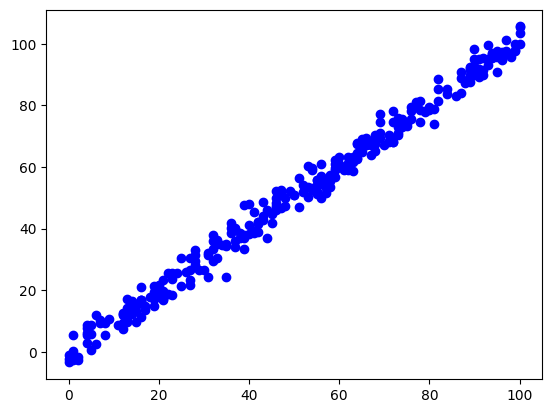

In [10]:
plt.scatter(X, y, c='b')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape

((240,), (60,))

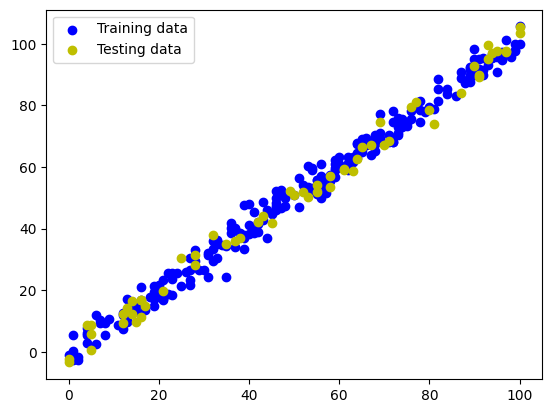

In [13]:
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.legend()
plt.show()

### Model Building

In [63]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
             metrics = ["mae"])

# train the model
epoch_number = 7
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/7


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 11.9120 - mae: 11.9120
Epoch 2/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6334 - mae: 3.6334 
Epoch 3/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6441 - mae: 3.6441 
Epoch 4/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8776 - mae: 2.8776 
Epoch 5/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4185 - mae: 3.4185 
Epoch 6/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7695 - mae: 2.7695 
Epoch 7/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4914 - mae: 2.4914 


In [64]:
X_train.shape

(240,)

In [65]:
tf.expand_dims(X_train, axis=-1).shape

TensorShape([240, 1])

In [66]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (168.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28 (116.00 B)

In [67]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[89.069435],
       [75.22849 ],
       [93.02398 ],
       [ 5.035177],
       [90.05807 ]], dtype=float32)

In [68]:
y_test[:5]

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


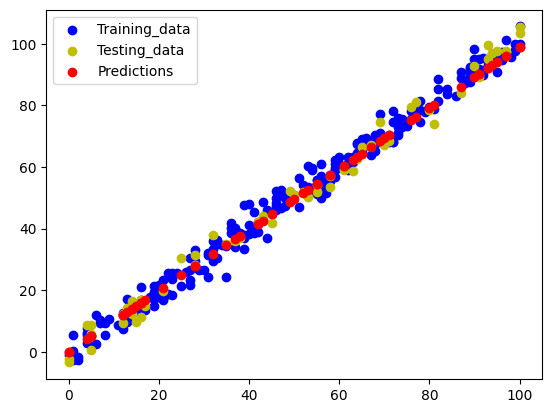

In [69]:
plt.scatter(X_train, y_train, c='b', label='Training_data')
plt.scatter(X_test, y_test, c='y', label='Testing_data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

### Evaluate Model

In [70]:
# Using evaluate method
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 2.6930 - mae: 2.6930


[2.5677311420440674, 2.5677311420440674]

In [71]:
# Using MAE (Mean Absolute Error)
mae = tf.metrics.mae(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.5677311420440674>

In [72]:
# Using MSE (Mean Squared Error)
mse = tf.metrics.mae(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.5677311420440674>

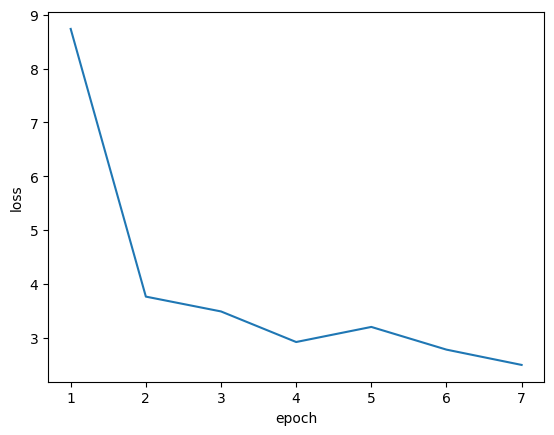

In [73]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### Model Weights and Baises

In [29]:
# Let's see finalized weight values and bias values
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[-0.8450377  -0.06108506  0.40092492  0.11008653]] 
Biases:
 [-0.3279076  -0.29192567  0.32730258  0.2994666 ]

Weights:
 [[-0.74731135]
 [-0.25954384]
 [ 0.81260484]
 [ 0.45580703]] 
Biases:
 [0.3129216]
